In [ ]:
import pandas as pd
import librosa
import librosa.display

# メタデータの読み込み
train_master = pd.read_csv('train_master.csv', index_col=0) 
label_master = pd.read_csv('label_master.csv')
sample_submit = pd.read_csv('sample_submit.csv', header=None)

# 最初の音声データ(train_0.au)の見てみる
y, sr = librosa.load('train_sound/train_0.au')
print('file size : ', y.shape)
print('sampling rate : ', sr)
print('len of audio : ', y.shape[0]/sr)

file size :  (661794,)
sampling rate :  22050
len of audio :  30.013333333333332


In [13]:
import IPython.display as ipd

ipd.Audio(y, rate=sr)

In [14]:
label_list = label_master.to_dict()['label_name']   
label_list

{0: 'blues',
 1: 'classical',
 2: 'country',
 3: 'disco',
 4: 'hiphop',
 5: 'jazz',
 6: 'metal',
 7: 'pop',
 8: 'reggae',
 9: 'rock'}

In [15]:
print(train_master['label_id'][0])
print(label_list[train_master['label_id'][0]])

8
reggae


/var/folders/d8/wkw09mvn41qb7dmtkv41txt40000gn/T/ipykernel_59285/2577794815.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(train_master['label_id'][0])
/var/folders/d8/wkw09mvn41qb7dmtkv41txt40000gn/T/ipykernel_59285/2577794815.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(label_list[train_master['label_id'][0]])


In [16]:
train_master['label_id'].value_counts().sort_index()

label_id
0    50
1    50
2    50
3    50
4    50
5    50
6    50
7    50
8    50
9    50
Name: count, dtype: int64

/var/folders/d8/wkw09mvn41qb7dmtkv41txt40000gn/T/ipykernel_59285/3289379073.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.title(f'label name : {label_list[train_master.label_id[0]]}')


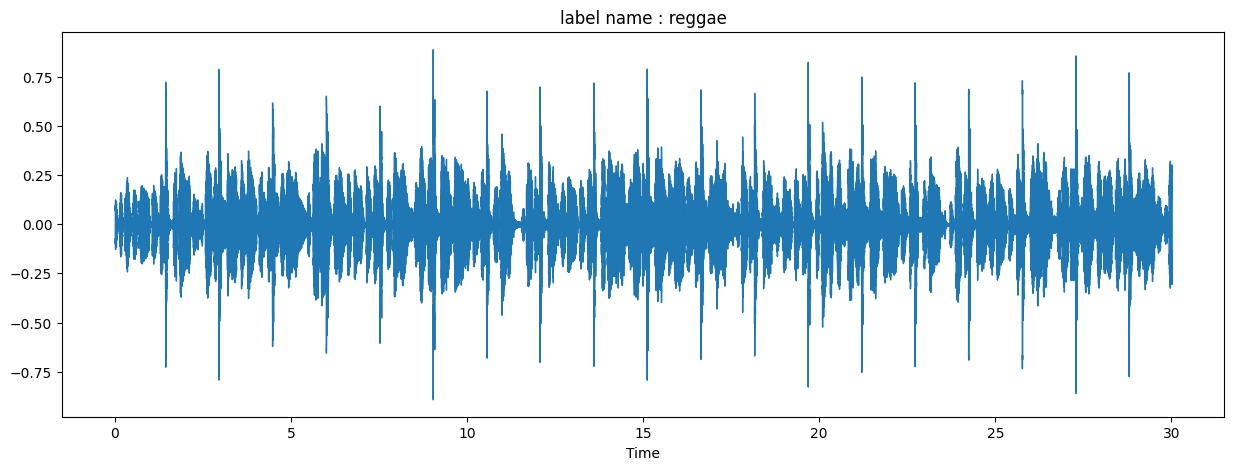

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

# 音声波形の表示
plt.figure(figsize=(15, 5))
librosa.display.waveshow(y=y, sr=sr)
plt.title(f'label name : {label_list[train_master.label_id[0]]}')

plt.show()

/var/folders/d8/wkw09mvn41qb7dmtkv41txt40000gn/T/ipykernel_59285/3563046936.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.title(f'label name : {label_list[train_master.label_id[0]]}')


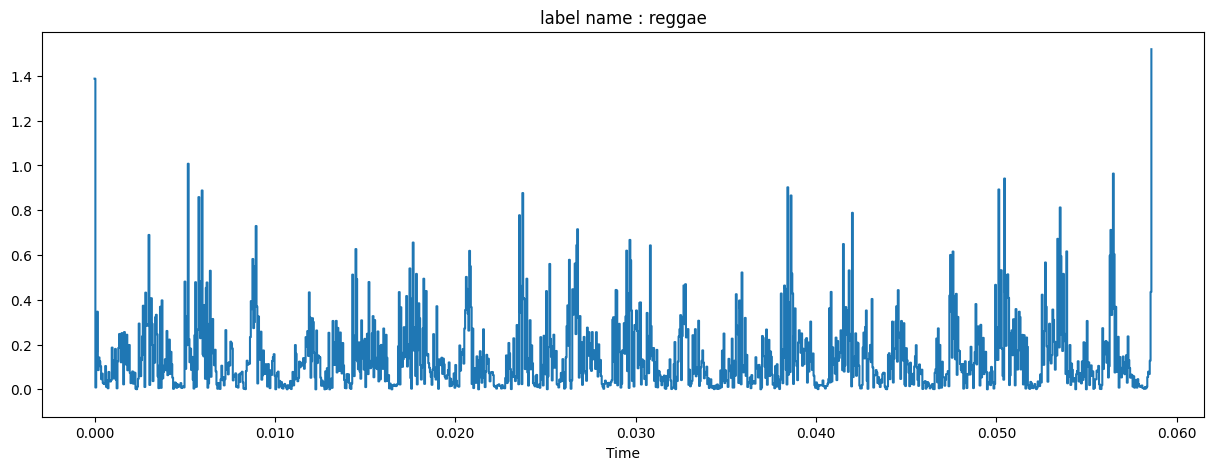

In [18]:
import numpy as np

# 短時間フーリエ変換（STFT）の表示
fft_data = np.abs(librosa.stft(y))
plt.figure(figsize=(15, 5))
librosa.display.waveshow(y=fft_data, sr=sr)
plt.title(f'label name : {label_list[train_master.label_id[0]]}')

plt.show()

/var/folders/d8/wkw09mvn41qb7dmtkv41txt40000gn/T/ipykernel_59285/1659759278.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.title(f'MelSpectrogram : {label_list[train_master.label_id[0]]}')


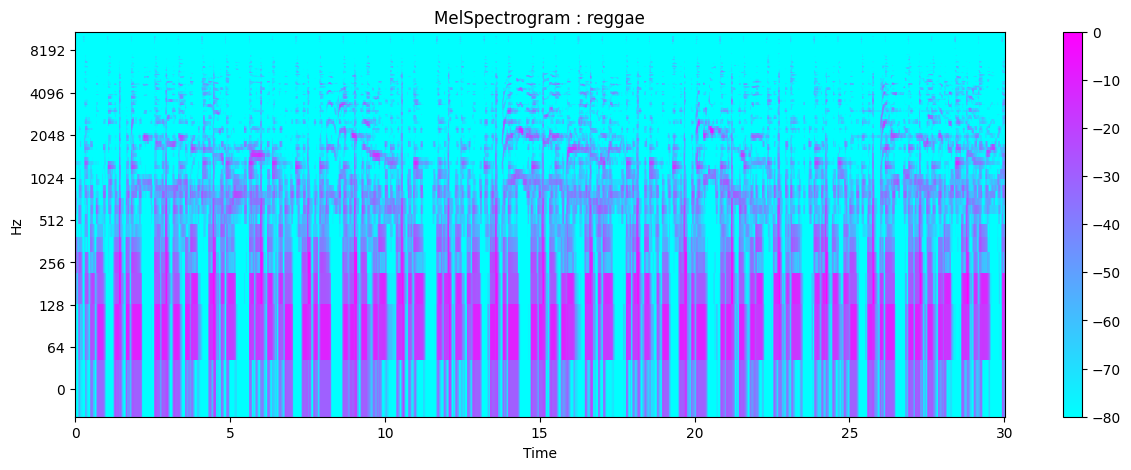

In [22]:

# 人間の聴覚に近い変換をするメルスペクトログラムの表示
mel = librosa.feature.melspectrogram(y=y, sr=sr)
mel_db = librosa.amplitude_to_db(mel, ref=np.max)
plt.figure(figsize=(15, 5))
librosa.display.specshow(mel_db, sr=sr, x_axis='time', y_axis='log', cmap='cool')
plt.colorbar()
plt.title(f'MelSpectrogram : {label_list[train_master.label_id[0]]}')

plt.show()

In [30]:
import glob
from natsort import natsorted

train_files = natsorted(glob.glob('train_sound/train_*.au'))
train = []
for file in train_files:
    y, sr = librosa.load(file)
    _ = librosa.feature.melspectrogram(y=y, sr=sr)
    y_mel = librosa.amplitude_to_db(_).flatten()
    train.append(y_mel)

# データフレームを作成
train_df_ = pd.DataFrame(train[0])
for i in range(1, 500):
    train_df_ = pd.concat([train_df_, pd.DataFrame(train[i])], axis=1) 
train_df = train_df_.T
train_df.index = train_master.index
train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,168950,168951,168952,168953,168954,168955,168956,168957,168958,168959
file_name,,,,,,,,,,,,,,,,,,,,,
train_0.au,-7.789927,-19.941963,-20.972717,-20.972717,-20.972717,-3.600178,6.179345,4.905142,-7.700305,-14.557312,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
train_1.au,25.218060,33.457951,39.591286,51.684685,52.734890,38.980862,37.035862,26.742329,22.528996,25.979362,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
train_2.au,-3.138300,5.774199,4.692557,-1.718674,-13.058101,-11.190216,-2.177546,0.601061,3.286123,1.408767,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
train_3.au,9.891685,21.015862,20.577801,19.583729,17.608437,18.490723,19.241711,20.368578,30.069183,43.685360,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
train_4.au,-13.330016,-2.933373,-1.406012,-3.603078,-7.126067,-5.982143,-5.565552,-5.967427,-8.887270,-7.463529,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
# 短いものに統一
train_df.dropna(axis=1, inplace=True)
train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,165110,165111,165112,165113,165114,165115,165116,165117,165118,165119
file_name,,,,,,,,,,,,,,,,,,,,,
train_0.au,-7.789927,-19.941963,-20.972717,-20.972717,-20.972717,-3.600178,6.179345,4.905142,-7.700305,-14.557312,...,-20.972717,-20.972717,-20.972717,-20.972717,-20.972717,-20.972717,-20.972717,-20.972717,-20.972717,-20.972717
train_1.au,25.218060,33.457951,39.591286,51.684685,52.734890,38.980862,37.035862,26.742329,22.528996,25.979362,...,-10.835159,-10.835159,-10.835159,-10.835159,-10.835159,-10.835159,-10.835159,-10.835159,-10.835159,-10.835159
train_2.au,-3.138300,5.774199,4.692557,-1.718674,-13.058101,-11.190216,-2.177546,0.601061,3.286123,1.408767,...,-24.081871,-24.081871,-24.081871,-24.081871,-24.081871,-24.081871,-24.081871,-24.081871,-24.081871,-24.081871
train_3.au,9.891685,21.015862,20.577801,19.583729,17.608437,18.490723,19.241711,20.368578,30.069183,43.685360,...,-7.066658,-7.066658,-7.066658,-7.066658,-7.066658,-7.066658,-7.066658,-7.066658,-7.066658,-7.066658
train_4.au,-13.330016,-2.933373,-1.406012,-3.603078,-7.126067,-5.982143,-5.565552,-5.967427,-8.887270,-7.463529,...,-22.807968,-22.807968,-22.807968,-22.807968,-22.807968,-22.807968,-22.807968,-22.807968,-22.807968,-22.807968


In [32]:
from sklearn.decomposition import PCA

n_components = 166
pca = PCA(n_components=n_components, random_state=82)
col = [f'pc{i}' for i in range(n_components)]
train_pca = pd.DataFrame(pca.fit_transform(train_df), columns=col)
print('累積寄与率', pca.explained_variance_ratio_.sum())

/Users/kishi/Documents/ローカルコード/★データ分析/【練習問題】音楽ラベリング/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:335: RuntimeWarning: divide by zero encountered in matmul
  Q, _ = normalizer(A @ Q)
/Users/kishi/Documents/ローカルコード/★データ分析/【練習問題】音楽ラベリング/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:335: RuntimeWarning: overflow encountered in matmul
  Q, _ = normalizer(A @ Q)
/Users/kishi/Documents/ローカルコード/★データ分析/【練習問題】音楽ラベリング/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:335: RuntimeWarning: invalid value encountered in matmul
  Q, _ = normalizer(A @ Q)
/Users/kishi/Documents/ローカルコード/★データ分析/【練習問題】音楽ラベリング/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:336: RuntimeWarning: divide by zero encountered in matmul
  Q, _ = normalizer(A.T @ Q)
/Users/kishi/Documents/ローカルコード/★データ分析/【練習問題】音楽ラベリング/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:336: RuntimeWarning: overflow encountered in matmul
  Q, _ = normalizer(A.T @ Q)
/Users/ki

累積寄与率 0.8005076


In [33]:
print(train_pca.shape)
train_pca.head()

(500, 166)


,pc0,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,...,pc156,pc157,pc158,pc159,pc160,pc161,pc162,pc163,pc164,pc165
0,-2166.459961,-675.390015,531.518372,280.585205,275.213837,459.428650,188.308517,311.562500,-197.231018,-48.264874,...,-151.962021,-63.878036,1.121619,-172.853104,-41.572674,-19.283504,-336.532593,-87.832756,136.969864,57.750107
1,3060.814453,-448.208435,690.379211,-130.341141,-335.248871,-239.632126,545.792114,106.630272,0.319133,509.290253,...,121.501854,-11.711205,65.608978,-28.773329,-19.766630,192.790558,-105.357605,-203.280899,28.111151,2.046779
2,-3514.238281,-506.371368,147.292969,343.871490,-35.549873,35.717094,109.661369,36.020039,-336.643127,-247.515045,...,350.887054,-260.906342,248.349838,-380.660797,118.832138,117.595161,-371.977173,-197.019012,-215.207687,-70.818962
3,3950.827393,-711.082397,1139.260376,-45.062122,223.687592,-67.665497,-318.172974,-340.283112,-129.381866,124.372818,...,-17.070663,42.434502,-40.881268,-133.471848,-43.045200,-1.875424,6.701721,23.763411,-46.554379,-3.824230
4,64.728676,329.513672,-763.436401,-343.710602,-548.635437,258.143372,-461.568970,370.017883,-366.610962,747.723389,...,-64.690605,-268.763031,-67.265022,-276.561035,-109.573349,-304.079773,-46.115311,229.732773,-366.754028,188.699005


In [37]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(train_pca, train_master['label_id'], test_size=0.1, random_state=0, stratify=train_master['label_id'])

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model = RandomForestClassifier(random_state=82)
model.fit(X_train, y_train)
pred = model.predict(X_valid)
accuracy_score(y_valid, pred)

0.36

In [39]:
from sklearn.model_selection import GridSearchCV

search_params = {
    'n_estimators': [10, 30, 50, 100, 200, 250, 300, 350],
    'max_depth': [5, 10, 15, 20, 25, 30],
    'min_samples_split': [5, 10, 15, 20, 25, 30],
    'random_state': [82]
}

gs = GridSearchCV(RandomForestClassifier(), search_params, verbose=3, cv=3)
gs.fit(X_train, y_train)
print(gs.best_estimator_)

Fitting 3 folds for each of 288 candidates, totalling 864 fits
[CV 1/3] END max_depth=5, min_samples_split=5, n_estimators=10, random_state=82;, score=0.293 total time=   0.0s
[CV 2/3] END max_depth=5, min_samples_split=5, n_estimators=10, random_state=82;, score=0.273 total time=   0.0s
[CV 3/3] END max_depth=5, min_samples_split=5, n_estimators=10, random_state=82;, score=0.307 total time=   0.0s
[CV 1/3] END max_depth=5, min_samples_split=5, n_estimators=30, random_state=82;, score=0.313 total time=   0.0s
[CV 2/3] END max_depth=5, min_samples_split=5, n_estimators=30, random_state=82;, score=0.287 total time=   0.0s
[CV 3/3] END max_depth=5, min_samples_split=5, n_estimators=30, random_state=82;, score=0.347 total time=   0.0s
[CV 1/3] END max_depth=5, min_samples_split=5, n_estimators=50, random_state=82;, score=0.353 total time=   0.0s
[CV 2/3] END max_depth=5, min_samples_split=5, n_estimators=50, random_state=82;, score=0.393 total time=   0.1s
[CV 3/3] END max_depth=5, min_sam

In [51]:
model = gs.best_estimator_
model.fit(X_train, y_train)
pred = model.predict(X_valid)
print('accuracy score : ', accuracy_score(y_valid, pred))

accuracy score :  0.54


In [53]:
# testにも適用
# データの読み込み
test_files = natsorted(glob.glob('test_sound/test_*.au'))
test = []
for file in test_files:
    y, sr = librosa.load(file) 
    _ = librosa.feature.melspectrogram(y=y, sr=sr)
    y_mel = librosa.amplitude_to_db(_).flatten()
    test.append((y_mel.astype(np.float16)))

test_df_ = pd.DataFrame(test[0])

for i in range(1, 500):
    test_df_ = pd.concat([test_df_, pd.DataFrame(test[i])], axis=1) 
test_df =test_df_.T
test_df.index = [f'test_{i}.au' for i in range(0, 500, 1)]
test_df = test_df[test_df.columns[:165120]]

# pca
test_df_pca = pd.DataFrame(pca.transform(test_df), columns=col)

y_pred = model.predict(test_df_pca)
sample_submit[1] = y_pred
sample_submit.to_csv('submit.csv', index=False, header=False)

/Users/kishi/Documents/ローカルコード/★データ分析/【練習問題】音楽ラベリング/.venv/lib/python3.9/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: divide by zero encountered in matmul
  X_transformed = X @ self.components_.T
/Users/kishi/Documents/ローカルコード/★データ分析/【練習問題】音楽ラベリング/.venv/lib/python3.9/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: overflow encountered in matmul
  X_transformed = X @ self.components_.T
/Users/kishi/Documents/ローカルコード/★データ分析/【練習問題】音楽ラベリング/.venv/lib/python3.9/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: invalid value encountered in matmul
  X_transformed = X @ self.components_.T
/Users/kishi/Documents/ローカルコード/★データ分析/【練習問題】音楽ラベリング/.venv/lib/python3.9/site-packages/sklearn/decomposition/_base.py:155: RuntimeWarning: divide by zero encountered in matmul
  X_transformed -= xp.reshape(self.mean_, (1, -1)) @ self.components_.T
/Users/kishi/Documents/ローカルコード/★データ分析/【練習問題】音楽ラベリング/.venv/lib/python3.9/site-packages/sklear